In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max_columns', None)

In [2]:
plt.rcParams['font.family'] = 'Nunito'
plt.rcParams['font.size'] = 10

# color_code = ['#80ADF7','#EFBA50']
font_name = 'Nunito'
font_size = 10
font_size_title = 12
font_weight = 'bold'
orange_color = '#EFBA50'
blue_color = '#80ADF7'
grey_color = '#B0BCC8'
green_color = '#9EEDE0'
darkgreen_color = '#3CDBC0'
red_color = '#FD7284'
brown_color = '#D8B475'
lightred_color = '#FF9592'
# color_code2 = [blue_color, grey_color]

background_color = "#F1F1F1"
border_color = "#B0BCC8"
text_align = 'center'
border_width ="0.5px"
border_style = 'solid'

body_design = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align}
body_design2 = {'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'70px'}
body_design3 = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'120px'}

border_design = {'selector': 'th', 'props': [('background-color' , background_color),('border-style' ,border_style),('font-family',font_name),('font-size',font_size),('border-width',border_width),('text-align',text_align),('border-color',border_color)]}
bar_width=0.5

In [3]:
%run path_changer.py

In [4]:
scenario_1_df = pd.read_csv(file_path + 'scenario_1_df.csv',low_memory=False)
scenario_1_df = scenario_1_df[scenario_1_df['trackrx_last_status'] == 'B']

scenario_2_df = pd.read_csv(file_path + 'scenario_2_df.csv',low_memory=False)
scenario_2_df = scenario_2_df[scenario_2_df['trackrx_last_status'] == 'B']


scenario_3_df = pd.read_csv(file_path + 'scenario_3_df.csv',low_memory=False)
scenario_3_df = scenario_3_df[scenario_3_df['trackrx_last_status'] == 'B']


scenario_4_df = pd.read_csv(file_path + 'scenario_4_df.csv',low_memory=False)
scenario_4_df = scenario_4_df[scenario_4_df['trackrx_last_status'] == 'B']

In [5]:
'rx_revenue' in scenario_1_df.columns

False

In [6]:
scenario_1_df['TOTALRXAMOUNT'] = scenario_1_df['TOTALRXAMOUNT'].astype(str)
scenario_2_df['TOTALRXAMOUNT'] = scenario_2_df['TOTALRXAMOUNT'].astype(str)
scenario_3_df['TOTALRXAMOUNT'] = scenario_3_df['TOTALRXAMOUNT'].astype(str)

scenario_4_df['TOTALRXAMOUNT'] = scenario_4_df['TOTALRXAMOUNT'].astype(str)


In [7]:
scenario_1_df['rx_revenue'] = scenario_1_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_2_df['rx_revenue'] = scenario_2_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_3_df['rx_revenue'] = scenario_3_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_4_df['rx_revenue'] = scenario_4_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)

In [8]:
scenario_1_df_tile = pd.pivot_table(scenario_1_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_2_df_tile = pd.pivot_table(scenario_2_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_3_df_tile = pd.pivot_table(scenario_3_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_4_df_tile = pd.pivot_table(scenario_4_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()

scenario_1_df_tile = scenario_1_df_tile.append(scenario_1_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_2_df_tile = scenario_2_df_tile.append(scenario_2_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_3_df_tile = scenario_3_df_tile.append(scenario_3_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_4_df_tile = scenario_4_df_tile.append(scenario_4_df_tile.sum(numeric_only=True), ignore_index=True)

scenario_1_df_tile['Rev/Rx'] = round(scenario_1_df_tile['rx_revenue']/scenario_1_df_tile['rx_code_key_location'],0)
scenario_2_df_tile['Rev/Rx'] = round(scenario_2_df_tile['rx_revenue']/scenario_2_df_tile['rx_code_key_location'],0)
scenario_3_df_tile['Rev/Rx'] = round(scenario_3_df_tile['rx_revenue']/scenario_3_df_tile['rx_code_key_location'],0)
scenario_4_df_tile['Rev/Rx'] = round(scenario_4_df_tile['rx_revenue']/scenario_4_df_tile['rx_code_key_location'],0)


In [9]:
scenario_1_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_2_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_3_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location,rx_revenue,Rev/Rx
0,FL-MI,34.0,18474.46,543.0
1,MD-BA,20.0,12881.84,644.0
2,NC-RA,8.0,9968.14,1246.0
3,NJ-SO,116.0,122460.89,1056.0
4,NY-BK,491.0,165511.33,337.0
5,NY-MA,63.0,3658.60,58.0
6,PA-PH,24.0,37895.35,1579.0
7,Total,756.0,370850.61,491.0


In [10]:
scenario_1_df_tile.columns = ['pharmacy_loc','rx_code_key_location_1','rx_revenue_1','Rev/Rx_1']
scenario_2_df_tile.columns = ['pharmacy_loc','rx_code_key_location_2','rx_revenue_2','Rev/Rx_2']
scenario_3_df_tile.columns = ['pharmacy_loc','rx_code_key_location_3','rx_revenue_3','Rev/Rx_3']
scenario_4_df_tile.columns = ['pharmacy_loc','rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,34.0,18474.46,543.0
1,MD-BA,20.0,12881.84,644.0
2,NC-RA,8.0,9968.14,1246.0
3,NJ-SO,116.0,122460.89,1056.0
4,NY-BK,491.0,165511.33,337.0
5,NY-MA,63.0,3658.60,58.0
6,PA-PH,24.0,37895.35,1579.0
7,Total,756.0,370850.61,491.0


In [11]:
scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']] = scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']].div(6)
scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']] = scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']].div(6)
scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']] = scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']].div(6)
scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']] = scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']].div(6)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,5.666667,3079.076667,543.0
1,MD-BA,3.333333,2146.973333,644.0
2,NC-RA,1.333333,1661.356667,1246.0
3,NJ-SO,19.333333,20410.148333,1056.0
4,NY-BK,81.833333,27585.221667,337.0
5,NY-MA,10.500000,609.766667,58.0
6,PA-PH,4.000000,6315.891667,1579.0
7,Total,126.000000,61808.435000,491.0


In [12]:
final_df = pd.merge(scenario_1_df_tile,scenario_2_df_tile,how='outer',on='pharmacy_loc').merge(scenario_3_df_tile,how='outer',on='pharmacy_loc').merge(scenario_4_df_tile,how='outer',on='pharmacy_loc')

In [13]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,2797.333333,3.388849e+05,121.0,5.500000,12594.151667,2290.0,0.166667,412.211667,2473.0,5.666667,3079.076667,543.0
1,MD-BA,698.000000,5.500980e+05,788.0,15.666667,22882.551667,1461.0,1.166667,1206.806667,1034.0,3.333333,2146.973333,644.0
2,NC-RA,464.666667,2.449644e+05,527.0,3.500000,11254.465000,3216.0,0.166667,5.666667,34.0,1.333333,1661.356667,1246.0
3,NJ-SO,3678.000000,1.925532e+06,524.0,42.833333,68598.003333,1602.0,5.666667,8651.596667,1527.0,19.333333,20410.148333,1056.0
4,NY-BK,7276.833333,3.306184e+06,454.0,98.166667,131904.085000,1344.0,10.500000,15503.228333,1476.0,81.833333,27585.221667,337.0
5,NY-MA,1589.333333,1.232491e+05,78.0,4.833333,733.956667,152.0,0.500000,80.341667,161.0,10.500000,609.766667,58.0
6,PA-PH,1307.833333,8.008416e+05,612.0,8.833333,16870.300000,1910.0,1.500000,1573.400000,1049.0,4.000000,6315.891667,1579.0
7,Total,17812.000000,7.289754e+06,409.0,179.333333,264837.513333,1477.0,19.666667,27433.251667,1395.0,126.000000,61808.435000,491.0


In [14]:
# for i in final_df.iloc[:,1:].columns:
#     final_df[i] = final_df[i].div(6)
#     #print(final_df[i].div(6))


In [15]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,2797.333333,3.388849e+05,121.0,5.500000,12594.151667,2290.0,0.166667,412.211667,2473.0,5.666667,3079.076667,543.0
1,MD-BA,698.000000,5.500980e+05,788.0,15.666667,22882.551667,1461.0,1.166667,1206.806667,1034.0,3.333333,2146.973333,644.0
2,NC-RA,464.666667,2.449644e+05,527.0,3.500000,11254.465000,3216.0,0.166667,5.666667,34.0,1.333333,1661.356667,1246.0
3,NJ-SO,3678.000000,1.925532e+06,524.0,42.833333,68598.003333,1602.0,5.666667,8651.596667,1527.0,19.333333,20410.148333,1056.0
4,NY-BK,7276.833333,3.306184e+06,454.0,98.166667,131904.085000,1344.0,10.500000,15503.228333,1476.0,81.833333,27585.221667,337.0
5,NY-MA,1589.333333,1.232491e+05,78.0,4.833333,733.956667,152.0,0.500000,80.341667,161.0,10.500000,609.766667,58.0
6,PA-PH,1307.833333,8.008416e+05,612.0,8.833333,16870.300000,1910.0,1.500000,1573.400000,1049.0,4.000000,6315.891667,1579.0
7,Total,17812.000000,7.289754e+06,409.0,179.333333,264837.513333,1477.0,19.666667,27433.251667,1395.0,126.000000,61808.435000,491.0


In [16]:
final_df.isnull().sum()

pharmacy_loc              0
rx_code_key_location_1    0
rx_revenue_1              0
Rev/Rx_1                  0
rx_code_key_location_2    0
rx_revenue_2              0
Rev/Rx_2                  0
rx_code_key_location_3    0
rx_revenue_3              0
Rev/Rx_3                  0
rx_code_key_location_4    0
rx_revenue_4              0
Rev/Rx_4                  0
dtype: int64

In [17]:
final_df.fillna(0,inplace=True)

In [18]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,2797.333333,3.388849e+05,121.0,5.500000,12594.151667,2290.0,0.166667,412.211667,2473.0,5.666667,3079.076667,543.0
1,MD-BA,698.000000,5.500980e+05,788.0,15.666667,22882.551667,1461.0,1.166667,1206.806667,1034.0,3.333333,2146.973333,644.0
2,NC-RA,464.666667,2.449644e+05,527.0,3.500000,11254.465000,3216.0,0.166667,5.666667,34.0,1.333333,1661.356667,1246.0
3,NJ-SO,3678.000000,1.925532e+06,524.0,42.833333,68598.003333,1602.0,5.666667,8651.596667,1527.0,19.333333,20410.148333,1056.0
4,NY-BK,7276.833333,3.306184e+06,454.0,98.166667,131904.085000,1344.0,10.500000,15503.228333,1476.0,81.833333,27585.221667,337.0
5,NY-MA,1589.333333,1.232491e+05,78.0,4.833333,733.956667,152.0,0.500000,80.341667,161.0,10.500000,609.766667,58.0
6,PA-PH,1307.833333,8.008416e+05,612.0,8.833333,16870.300000,1910.0,1.500000,1573.400000,1049.0,4.000000,6315.891667,1579.0
7,Total,17812.000000,7.289754e+06,409.0,179.333333,264837.513333,1477.0,19.666667,27433.251667,1395.0,126.000000,61808.435000,491.0


In [19]:
float_columns = ['rx_code_key_location_1','rx_revenue_1','Rev/Rx_1',
                 'rx_code_key_location_2','rx_revenue_2','Rev/Rx_2',
                 'rx_code_key_location_3','rx_revenue_3','Rev/Rx_3',
                 'rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']

In [20]:
for i in final_df[float_columns]:
    final_df[i] = final_df[i].astype('int')

In [21]:
final_df.dtypes

pharmacy_loc              object
rx_code_key_location_1     int32
rx_revenue_1               int32
Rev/Rx_1                   int32
rx_code_key_location_2     int32
rx_revenue_2               int32
Rev/Rx_2                   int32
rx_code_key_location_3     int32
rx_revenue_3               int32
Rev/Rx_3                   int32
rx_code_key_location_4     int32
rx_revenue_4               int32
Rev/Rx_4                   int32
dtype: object

In [22]:
final_df[['percent_revenue_loc_1','percent_revenue_loc_2','percent_revenue_loc_3','percent_revenue_loc_4']] = round(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].div(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].sum(axis=1), axis=0),2)
final_df[['percent_rx_count_loc_1','percent_rx_count_loc_2','percent_rx_count_loc_3','percent_rx_count_loc_4']] = round(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].div(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].sum(axis=1), axis=0),2)
final_df[['percent_Rev/Rx_1_loc_1','percent_Rev/Rx_2_loc_2','percent_Rev/Rx_3_loc_3','percent_Rev/Rx_4_loc_4']] = round(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].div(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].sum(axis=1), axis=0),2)

In [23]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,2797,338884,121,5,12594,2290,0,412,2473,5,3079,543,0.95,0.04,0.0,0.01,1.00,0.00,0.0,0.00,0.02,0.42,0.46,0.10
1,MD-BA,698,550097,788,15,22882,1461,1,1206,1034,3,2146,644,0.95,0.04,0.0,0.00,0.97,0.02,0.0,0.00,0.20,0.37,0.26,0.16
2,NC-RA,464,244964,527,3,11254,3216,0,5,34,1,1661,1246,0.95,0.04,0.0,0.01,0.99,0.01,0.0,0.00,0.10,0.64,0.01,0.25
3,NJ-SO,3678,1925532,524,42,68598,1602,5,8651,1527,19,20410,1056,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.34,0.32,0.22
4,NY-BK,7276,3306184,454,98,131904,1344,10,15503,1476,81,27585,337,0.95,0.04,0.0,0.01,0.97,0.01,0.0,0.01,0.13,0.37,0.41,0.09
5,NY-MA,1589,123249,78,4,733,152,0,80,161,10,609,58,0.99,0.01,0.0,0.00,0.99,0.00,0.0,0.01,0.17,0.34,0.36,0.13
6,PA-PH,1307,800841,612,8,16870,1910,1,1573,1049,4,6315,1579,0.97,0.02,0.0,0.01,0.99,0.01,0.0,0.00,0.12,0.37,0.20,0.31
7,Total,17812,7289754,409,179,264837,1477,19,27433,1395,126,61808,491,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.39,0.37,0.13


In [24]:
abs(19277398-19302244)

24846

In [25]:
14422023+3601499+796343+482379

19302244

In [26]:
949913+380950+79165+24110

1434138

In [27]:
import math

millnames = ['',' k',' M',' Bn',' Tn']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [28]:
final_df['rx_revenue_1'] = final_df['rx_revenue_1'].map(millify)
final_df['rx_revenue_2'] = final_df['rx_revenue_2'].map(millify)
final_df['rx_revenue_3'] = final_df['rx_revenue_3'].map(millify)
final_df['rx_revenue_4'] = final_df['rx_revenue_4'].map(millify)

In [29]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,2797,339 k,121,5,13 k,2290,0,412,2473,5,3 k,543,0.95,0.04,0.0,0.01,1.00,0.00,0.0,0.00,0.02,0.42,0.46,0.10
1,MD-BA,698,550 k,788,15,23 k,1461,1,1 k,1034,3,2 k,644,0.95,0.04,0.0,0.00,0.97,0.02,0.0,0.00,0.20,0.37,0.26,0.16
2,NC-RA,464,245 k,527,3,11 k,3216,0,5,34,1,2 k,1246,0.95,0.04,0.0,0.01,0.99,0.01,0.0,0.00,0.10,0.64,0.01,0.25
3,NJ-SO,3678,2 M,524,42,69 k,1602,5,9 k,1527,19,20 k,1056,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.34,0.32,0.22
4,NY-BK,7276,3 M,454,98,132 k,1344,10,16 k,1476,81,28 k,337,0.95,0.04,0.0,0.01,0.97,0.01,0.0,0.01,0.13,0.37,0.41,0.09
5,NY-MA,1589,123 k,78,4,733,152,0,80,161,10,609,58,0.99,0.01,0.0,0.00,0.99,0.00,0.0,0.01,0.17,0.34,0.36,0.13
6,PA-PH,1307,801 k,612,8,17 k,1910,1,2 k,1049,4,6 k,1579,0.97,0.02,0.0,0.01,0.99,0.01,0.0,0.00,0.12,0.37,0.20,0.31
7,Total,17812,7 M,409,179,265 k,1477,19,27 k,1395,126,62 k,491,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.39,0.37,0.13


In [30]:
pwd

'c:\\Users\\vidhi.mittal\\Documents\\Automation\\MBR_3\\OPS_MBR_Github\\ops_mbr\\RX\\image_generation\\Refill\\Slide_17_to_24'

In [31]:
rev_rx = final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']]
rev_rx

,Rev/Rx_1,Rev/Rx_2,Rev/Rx_3,Rev/Rx_4
0,121,2290,2473,543
1,788,1461,1034,644
2,527,3216,34,1246
3,524,1602,1527,1056
4,454,1344,1476,337
5,78,152,161,58
6,612,1910,1049,1579
7,409,1477,1395,491


In [32]:
final_df = final_df.join(rev_rx.rank(axis=1, ascending=False).astype(int).add_prefix('rank_'))
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,2797,339 k,121,5,13 k,2290,0,412,2473,5,3 k,543,0.95,0.04,0.0,0.01,1.00,0.00,0.0,0.00,0.02,0.42,0.46,0.10,4,2,1,3
1,MD-BA,698,550 k,788,15,23 k,1461,1,1 k,1034,3,2 k,644,0.95,0.04,0.0,0.00,0.97,0.02,0.0,0.00,0.20,0.37,0.26,0.16,3,1,2,4
2,NC-RA,464,245 k,527,3,11 k,3216,0,5,34,1,2 k,1246,0.95,0.04,0.0,0.01,0.99,0.01,0.0,0.00,0.10,0.64,0.01,0.25,3,1,4,2
3,NJ-SO,3678,2 M,524,42,69 k,1602,5,9 k,1527,19,20 k,1056,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.34,0.32,0.22,4,1,2,3
4,NY-BK,7276,3 M,454,98,132 k,1344,10,16 k,1476,81,28 k,337,0.95,0.04,0.0,0.01,0.97,0.01,0.0,0.01,0.13,0.37,0.41,0.09,3,2,1,4
5,NY-MA,1589,123 k,78,4,733,152,0,80,161,10,609,58,0.99,0.01,0.0,0.00,0.99,0.00,0.0,0.01,0.17,0.34,0.36,0.13,3,2,1,4
6,PA-PH,1307,801 k,612,8,17 k,1910,1,2 k,1049,4,6 k,1579,0.97,0.02,0.0,0.01,0.99,0.01,0.0,0.00,0.12,0.37,0.20,0.31,4,1,3,2
7,Total,17812,7 M,409,179,265 k,1477,19,27 k,1395,126,62 k,491,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.39,0.37,0.13,4,1,2,3


In [33]:
color_list = {1:darkgreen_color,2:green_color,3:lightred_color,4:red_color}

In [34]:
for i in final_df[['rank_Rev/Rx_1','rank_Rev/Rx_2','rank_Rev/Rx_3','rank_Rev/Rx_4']]:
    final_df[i] = final_df[i].replace(color_list)

In [35]:
for i,idx in final_df.iterrows():
    #print(i)
    print(idx[-4:].values)

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#FD7284' '#9EEDE0']
['#FD7284' '#3CDBC0' '#9EEDE0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FD7284' '#3CDBC0' '#FF9592' '#9EEDE0']
['#FD7284' '#3CDBC0' '#9EEDE0' '#FF9592']


In [36]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,2797,339 k,121,5,13 k,2290,0,412,2473,5,3 k,543,0.95,0.04,0.0,0.01,1.00,0.00,0.0,0.00,0.02,0.42,0.46,0.10,#FD7284,#9EEDE0,#3CDBC0,#FF9592
1,MD-BA,698,550 k,788,15,23 k,1461,1,1 k,1034,3,2 k,644,0.95,0.04,0.0,0.00,0.97,0.02,0.0,0.00,0.20,0.37,0.26,0.16,#FF9592,#3CDBC0,#9EEDE0,#FD7284
2,NC-RA,464,245 k,527,3,11 k,3216,0,5,34,1,2 k,1246,0.95,0.04,0.0,0.01,0.99,0.01,0.0,0.00,0.10,0.64,0.01,0.25,#FF9592,#3CDBC0,#FD7284,#9EEDE0
3,NJ-SO,3678,2 M,524,42,69 k,1602,5,9 k,1527,19,20 k,1056,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.34,0.32,0.22,#FD7284,#3CDBC0,#9EEDE0,#FF9592
4,NY-BK,7276,3 M,454,98,132 k,1344,10,16 k,1476,81,28 k,337,0.95,0.04,0.0,0.01,0.97,0.01,0.0,0.01,0.13,0.37,0.41,0.09,#FF9592,#9EEDE0,#3CDBC0,#FD7284
5,NY-MA,1589,123 k,78,4,733,152,0,80,161,10,609,58,0.99,0.01,0.0,0.00,0.99,0.00,0.0,0.01,0.17,0.34,0.36,0.13,#FF9592,#9EEDE0,#3CDBC0,#FD7284
6,PA-PH,1307,801 k,612,8,17 k,1910,1,2 k,1049,4,6 k,1579,0.97,0.02,0.0,0.01,0.99,0.01,0.0,0.00,0.12,0.37,0.20,0.31,#FD7284,#3CDBC0,#FF9592,#9EEDE0
7,Total,17812,7 M,409,179,265 k,1477,19,27 k,1395,126,62 k,491,0.95,0.03,0.0,0.01,0.98,0.01,0.0,0.01,0.11,0.39,0.37,0.13,#FD7284,#3CDBC0,#9EEDE0,#FF9592


In [37]:
empty=[]
for i,p in final_df.iterrows():
    print(p[-4:].values)
    empty.append(p[-4:].values)
    
   #empty.append(i[-4:]) 

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#FD7284' '#9EEDE0']
['#FD7284' '#3CDBC0' '#9EEDE0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FD7284' '#3CDBC0' '#FF9592' '#9EEDE0']
['#FD7284' '#3CDBC0' '#9EEDE0' '#FF9592']


In [38]:
final_df['colors_name'] = empty

In [39]:
for i,y in final_df.iterrows():
    print(list(y[-1:][0]))

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#FD7284', '#9EEDE0']
['#FD7284', '#3CDBC0', '#9EEDE0', '#FF9592']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FD7284', '#3CDBC0', '#FF9592', '#9EEDE0']
['#FD7284', '#3CDBC0', '#9EEDE0', '#FF9592']


In [40]:
empty[0].tolist()

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']

In [41]:
colors=[]

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


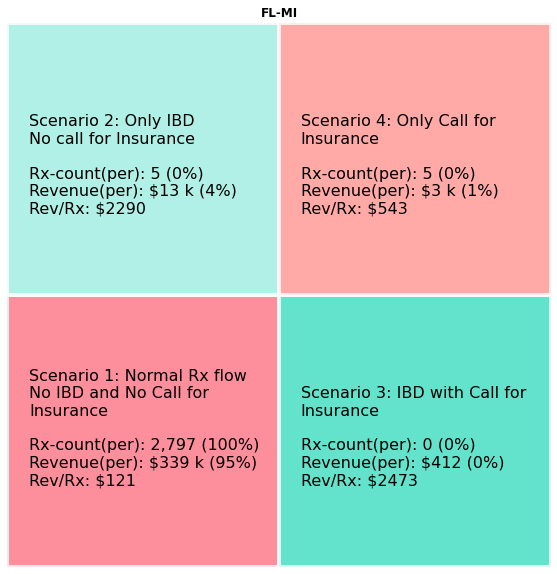

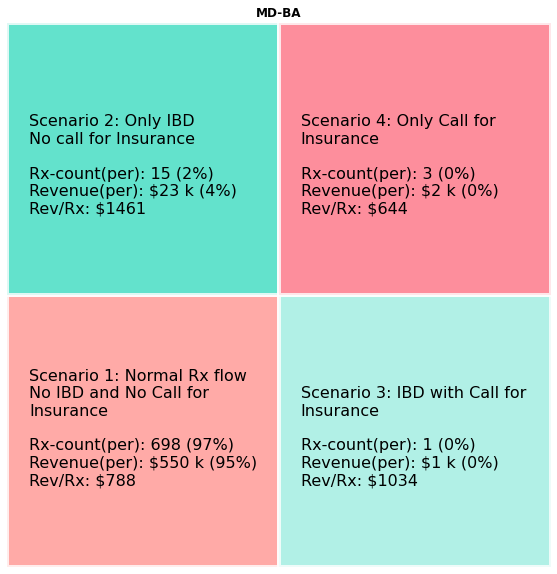

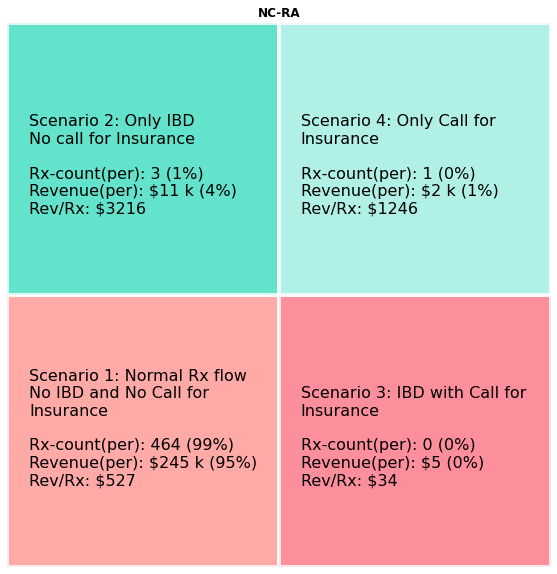

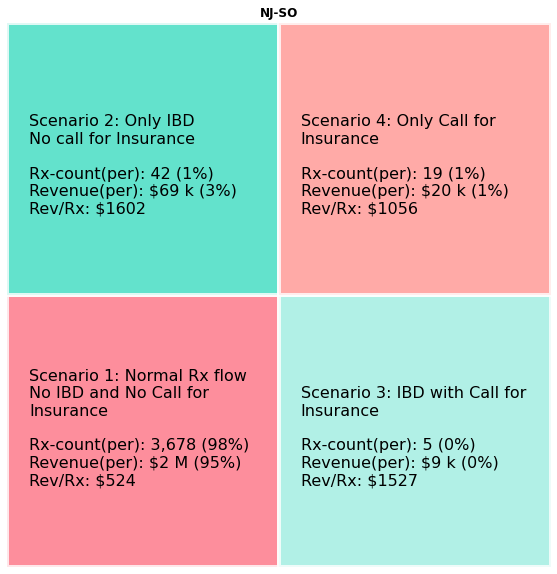

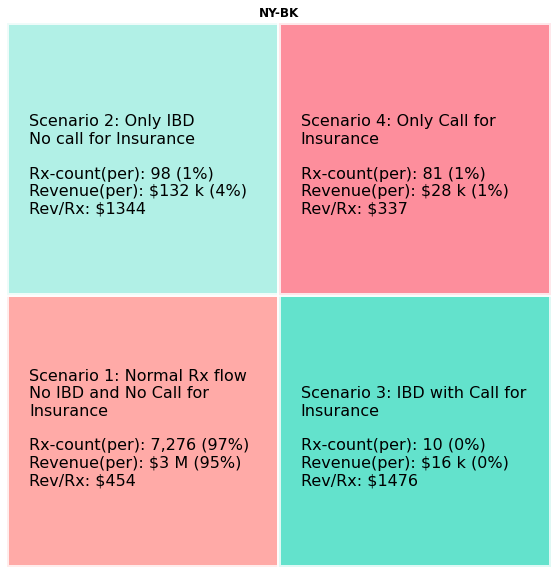

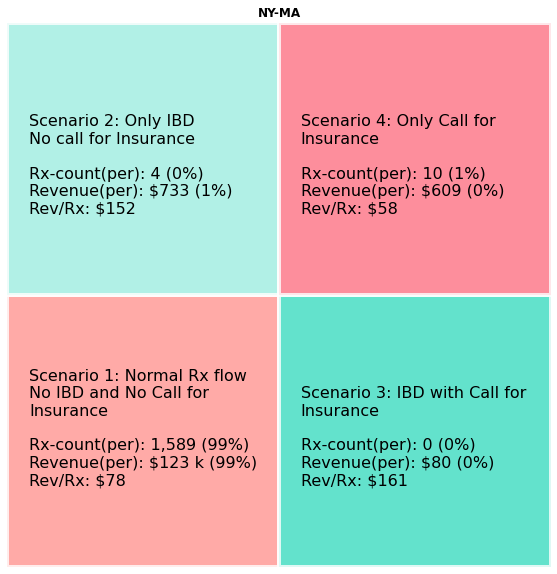

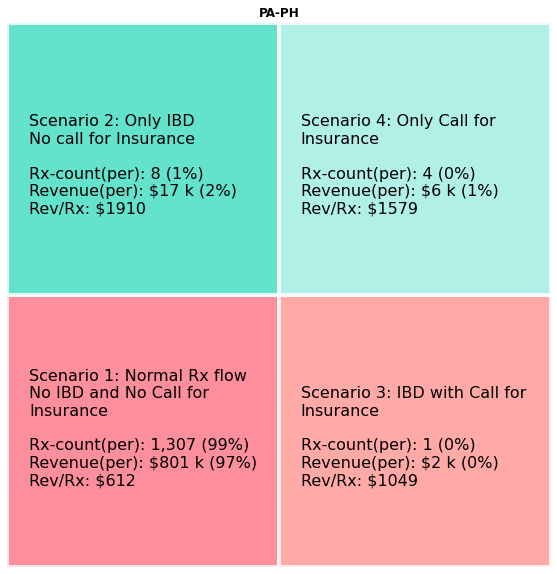

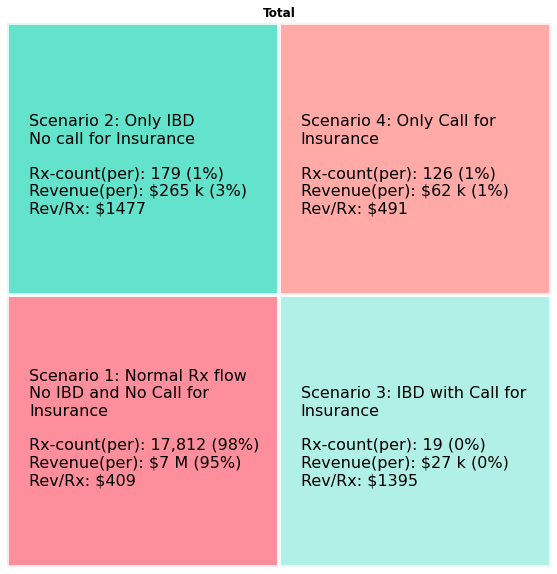

In [42]:
for i in final_df.pharmacy_loc:
    #print(i)
    loc_df = final_df[final_df['pharmacy_loc'] == i]
    for p,k in loc_df.iterrows():
        sizes = [50, 50, 50, 50]
        fig, ax = plt.subplots(figsize=(10,10))
        colors=k[-1:][0]
        #print(colors)
        ax = squarify.plot(
            sizes,
            norm_x=100,
            norm_y=100,
            #label=names,
            #color=k[-4:].values,
             color=colors,
#             print(color)
            alpha=.8,
            edgecolor="white",
            linewidth=4)
        #'{:.0f}%'.format(height)

        a = ax.text(4,15, 'Scenario 1: Normal Rx flow \nNo IBD and No Call for \nInsurance\n\nRx-count(per): '+f'{int(k[1]):,}'+' ('+str(f'{round(k[17]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[2])+' ('+str(f'{round(k[13]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[3]),
                            fontsize=16)

        a = ax.text(4, 65, 'Scenario 2: Only IBD \nNo call for Insurance\n\nRx-count(per): '+f'{int(k[4]):,}'+' ('+str(f'{round(k[18]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[5])+' ('+str(f'{round(k[14]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[6]),
                            fontsize=16)


        a = ax.text(54, 15, 'Scenario 3: IBD with Call for \nInsurance\n\nRx-count(per): '+f'{int(k[7]):,}'+' ('+str(f'{round(k[19]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[8])+' ('+str(f'{round(k[15]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[9]),
                            fontsize=16)

        a = ax.text(54, 65, 'Scenario 4: Only Call for \nInsurance\n\nRx-count(per): '+f'{int(k[10]):,}'+' ('+str(f'{round(k[20]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[11])+' ('+str(f'{round(k[16]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[12]),
                            fontsize=16)
        ax.set_aspect('equal')
        plt.title(i,fontsize = font_size_title,fontweight=font_weight ,fontname = font_name,)
        plt.axis('off')
        
        plt.savefig(image_path+i+'_refill.png',bbox_inches = 'tight',pad_inches = 0,dpi=300)
        plt.show()